<a href="https://colab.research.google.com/github/reemsabry56/ML_projects/blob/main/heart_disease_ML_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing** libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [2]:
# loading data set
data= pd.read_csv('heart_disease_df_1.csv')


Data Preprocessing

In [3]:
# Print the first 5 rows of the DataFrame
print(data.head())

# Print information about the DataFrame
print(data.info())


   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   52    1  0.0       125  212.0    0      1.0      168      0      NaN   
1   53    1  0.0       140  203.0    1      0.0      155      1      NaN   
2   70    1  0.0       145  174.0    0      1.0      125      1      NaN   
3   61    1  0.0       148  203.0    0      1.0      161      0      NaN   
4   62    0  0.0       138  294.0    1      1.0      106      0      NaN   

   slope  ca  thal  target  
0      2   2     3       0  
1      0   0     3       0  
2      0   0     3       0  
3      2   1     3       0  
4      1   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1076 entries, 0 to 1075
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1076 non-null   int64  
 1   sex       1076 non-null   int64  
 2   cp        1023 non-null   float64
 3   trestbps  1076 non-null   int64  
 4   chol      1021 non-null

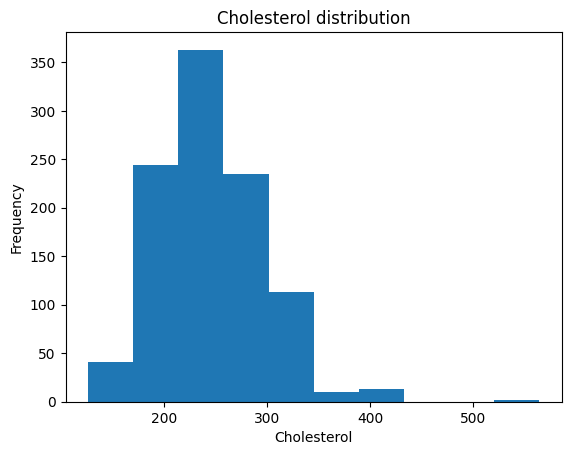

In [4]:
# Visualize the cholesterol column
data['chol'].plot(kind='hist')

# Set the title and axis labels
plt.title('Cholesterol distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Print the sex value counts of the heart disease dataset
print(data['sex'].value_counts())

sex
1    743
0    333
Name: count, dtype: int64


In [6]:
# Drop empty columns
data = data.drop(['oldpeak'], axis=1)

# Drop duplicate rows
data = data.drop_duplicates()

# Calculate the mean value of the restecg column
mean_value = data['restecg'].mean()

# Impute missing values with the mean
data['restecg'].fillna(mean_value,inplace= True)
print(data['restecg'].isna().any())

False


<ipython-input-6-c5df565bd45a>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['restecg'].fillna(mean_value,inplace= True)


**Feature** **Enginnering**

Normalization

to convert data to the range of 0,1


In [7]:
# splitting data into train_test data
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)


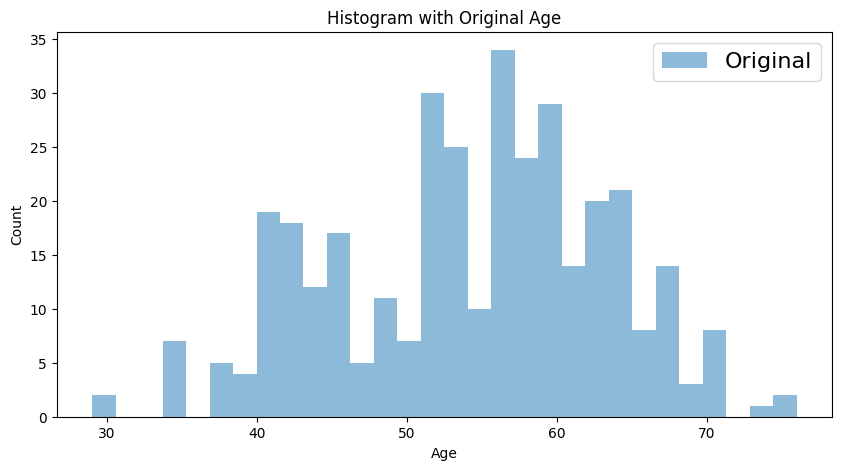

In [8]:
# Show the initial distribution of 'age'
age = X_train['age']
plt.figure(figsize=(10,5))
plt.hist(age, bins=30, alpha=0.5, label='Original')
plt.legend(prop={'size': 16})
plt.title('Histogram with Original Age');
plt.xlabel('Age'); plt.ylabel('Count');
plt.show()

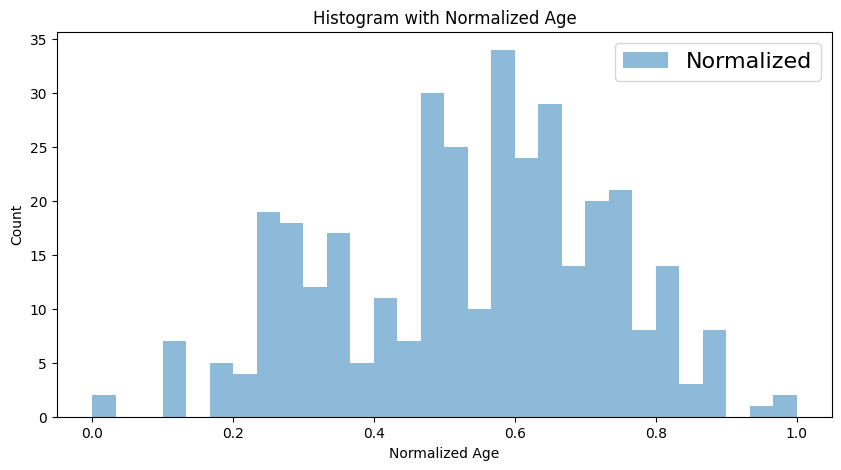

In [9]:
# Normalize 'age' on the training set.
normalizer = MinMaxScaler()
X_train['age'] = normalizer.fit_transform(X_train['age'].values.reshape(-1,1))

# Use the same normalizer to transform the 'age' column of the test set to avoid data leakage
X_test['age'] = normalizer.transform(X_test['age'].values.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.hist(X_train['age'], bins=30, alpha=0.5, label='Normalized')
plt.legend(prop={'size': 16})
plt.title('Histogram with Normalized Age')
plt.xlabel('Normalized Age')
plt.ylabel('Count')
plt.show()

Standardization

To convert the data into mean of  0, variance =1

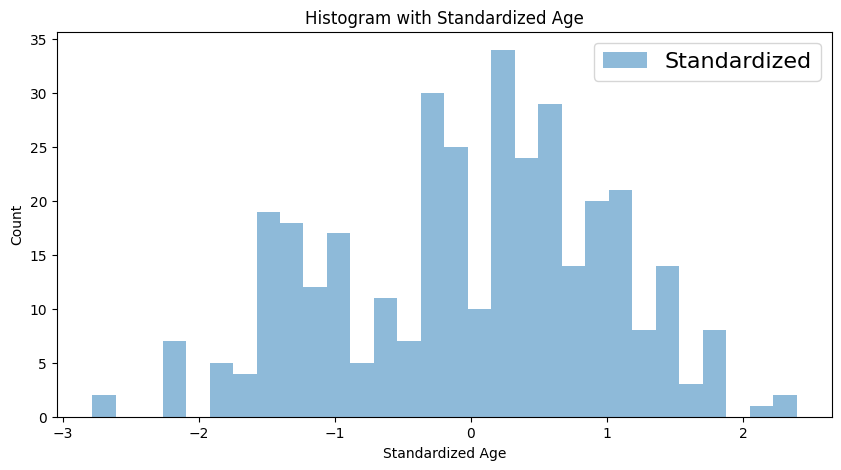

In [10]:
# Standardize 'age' on the training set and use the same standardizer to transform the 'age' column of the test set to avoid data leakage
standardizer = StandardScaler()
X_train['age'] = standardizer.fit_transform(X_train['age'].values.reshape(-1,1))
X_test['age'] = standardizer.transform(X_test['age'].values.reshape(-1,1))

plt.figure(figsize=(10,5))
plt.hist(X_train['age'], bins=30, alpha=0.5, label='Standardized')
plt.legend(prop={'size': 16})
plt.title('Histogram with Standardized Age')
plt.xlabel('Standardized Age')
plt.ylabel('Count')
plt.show()

Feature selection

In [11]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Original features: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'slope', 'ca', 'thal'],
      dtype='object')

Selected features: Index(['cp', 'thalach', 'slope', 'ca', 'thal'], dtype='object')


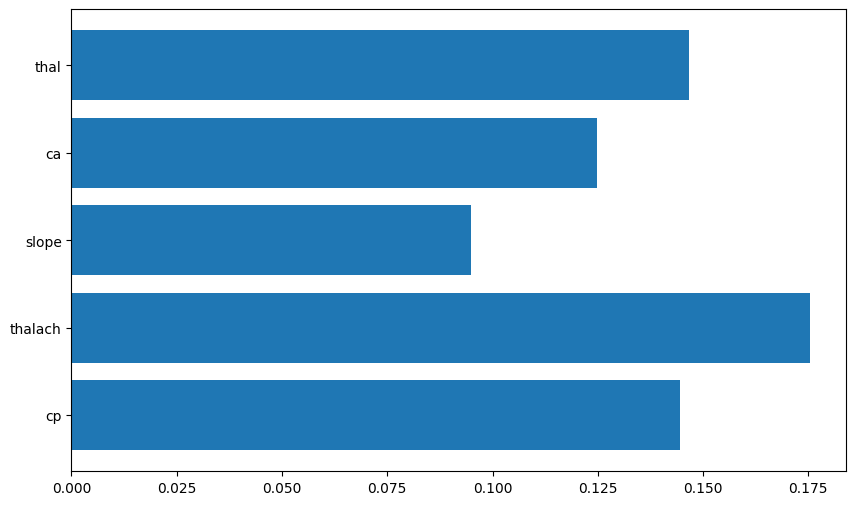

In [12]:
# Define the random forest model and fit to the training data
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
rf.fit(X_train, y_train)

# Define the feature selection object
model = SelectFromModel(rf, prefit=True)

# Transform the training features
X_train_transformed = model.transform(X_train)

original_features = data.columns[:-1]
print(f"Original features: {original_features}")

# Select the features deemed important by the SelectFromModel
features_bool = model.get_support()
selected_features = original_features[features_bool]

print(f"\nSelected features: {selected_features}")

feature_importance = pd.DataFrame({
    "feature": selected_features,
    "importance": rf.feature_importances_[features_bool]
})
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["feature"], feature_importance["importance"])
plt.show()

Model Training

In [14]:


heart_disease_X=data.drop('target', axis=1)
heart_disease_y= data['target']
X_train,X_test,y_train,y_test = train_test_split(heart_disease_X, heart_disease_y, test_size=0.2, random_state=42)

# Create a SimpleImputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Only transform on test data to avoid data leakage

# Define the SVM / SVC model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Get predictions from the model
y_pred = svc_model.predict(X_test)
print(y_pred)

[0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0
 1 1 1 0 0 1 0 1 0 1 0 1 0 0]


Model evaluation and visualization

In [15]:
bal_accuracy= balanced_accuracy_score(y_test,y_pred)
print(f"balanced accuracy: {bal_accuracy:.2f}")

balanced accuracy: 0.84


In [16]:

# Create a KFold object
kfold = KFold(n_splits=5, shuffle= True, random_state= 42)

# Get the train and test data from the first split from the shuffled KFold
train_data_split, test_data_split = next(kfold.split(heart_disease_X))

# Print out the number of datapoints in the train and test splits
print("Number of training datapoints in heart_disease_df_X:", len(heart_disease_X))
print("Number of training datapoints in split:", len(train_data_split))
print("Number of testing datapoints in split:",len(test_data_split) )

Number of training datapoints in heart_disease_df_X: 438
Number of training datapoints in split: 350
Number of testing datapoints in split: 88


In [17]:
# logistic model

model= LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Evaluate model using k-fold cross-validation
kf = KFold(n_splits=5)

# Compute the cross-validation score
score = cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=kf)
print(score)

# Get model predictions
y_pred = model.predict(X_test)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.94583333 0.87746711 0.79394449 0.79761905 0.85566584]
[[40 10]
 [ 4 34]]


**Model Deployment**

Test the model

In [ ]:
import unittest

class TestModelInference(unittest.TestCase):
  def setUp(self):
    self.model= model
    self.X_test= X_test
  def test_prediction_output_shape(self):
    y_pred = self.model.predict(self.X_test)
    self.assertEqual(y_pred.shape[0], self.X_test.shape[0])
if __name__ == '__main__':
  unittest.main()